# Top Words in Positive and Negative Bank of England Speeches

This analysis focuses on speeches delivered by the Bank of England, identifying the top five most frequently used words from each of the top 15 most positive and top 15 most negative speeches. 

### **Time Frame: 01-Jan-2008 to 31-Dec-2012**

# 1. Import the necessary libraries and load the data source

In [3]:
# Import necessary libraries for data handling, visualization, and text processing 
import pandas as pd                     # For data manipulation and analysis
import matplotlib.pyplot as plt         # For creating static plots
import seaborn as sns                   # For enhanced data visualizations
from wordcloud import WordCloud         # For generating word clouds from text data
from collections import Counter         # For counting word frequencies
from sklearn.feature_extraction.text import CountVectorizer  # For converting text to a matrix of token counts

# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/gamzebb/group-project/refs/heads/main/df_uk_for_top_speeches.csv")

# Display the first few rows of the dataset to preview the data
df.head()


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,SentimentScore_nltk,...,Year_Chunk,polarity_textblob,subjectivity_textblob,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,Sentiment_vader,lexicon_score,roberta_sentiment
0,r980915a_BOE,United Kingdom,15-09-98,1998.0,September,Speech,George,Yes,thank chairman actually pleased opportunity re...,-54.9,...,1995–1999,0.064536841,0.427930,0.737529,0.099846,0.162625,-0.062779,-0.9927,-54.9,Neutral
1,r981021b_BOE,United Kingdom,21-10-98,1998.0,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...,-51.8,...,1995–1999,0.06279094,0.356223,0.532217,0.466339,0.001444,0.464896,0.9995,-51.8,Neutral
2,r981021a_BOE,United Kingdom,21-10-98,1998.0,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...,-97.6,...,1995–1999,0.067740919,0.380480,0.808452,0.022303,0.169245,-0.146942,-0.9906,-97.6,Negative
3,r981101a_BOE,United Kingdom,01-11-98,1998.0,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policymak...,-153.8,...,1995–1999,0.055704712,0.465611,0.983587,0.015397,0.001015,0.014382,-0.9952,-153.8,Neutral
4,r981101b_BOE,United Kingdom,01-11-98,1998.0,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...,-219.8,...,1995–1999,0.048788618,0.387690,0.983661,0.015350,0.000989,0.014361,-0.9993,-219.8,Neutral


# 2. **Process Data, Format It, and Apply Data Frame Filter**

In [22]:
import warnings
warnings.filterwarnings("ignore", message="Could not infer format*")

# Convert the 'Date' column to datetime, assuming day-month-year format (handles mixed styles like 01/02/2022 and 01-Feb-2022)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Remove rows with invalid or missing dates
df = df.dropna(subset=['Date'])

# Filter the DataFrame for a specific time period
start_date = "2008-01-01"  # Start of the time period (YYYY-MM-DD)
end_date = "2012-12-31"    # End of the time period (YYYY-MM-DD)

# Convert the start and end dates to datetime for comparison
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter rows within the date range
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Standardize the date format to '01-Jan-2022' as string
df['Date'] = df['Date'].dt.strftime('%d-%b-%Y')

# Display the first few formatted dates
print(df['Date'].head())

import datetime

# Example start_date and end_date
start_date = "2008-01-01"
end_date = "2012-12-31"

# Convert to datetime objects
start_date_obj = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_date_obj = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Format as "Month Year" (e.g., "January 2022")
start_date_formatted = start_date_obj.strftime("%B %Y")
end_date_formatted = end_date_obj.strftime("%B %Y")

# Example usage in title
print(f"From {start_date_formatted} to {end_date_formatted}")

308    25-Sep-2008
309    24-Jul-2008
310    31-Jul-2008
311    12-Sep-2008
312    18-Sep-2008
Name: Date, dtype: object
From January 2008 to December 2012


# 3. Clean the 'polarity_score_finbert' column by converting it to numeric, removing invalid values, and selecting the top 15 highest scores.

In [24]:
# Convert 'polarity_textblob' column to numeric values (coerce invalid entries to NaN),
# then remove rows with NaN in that column,
# and finally select the top 10 rows with the highest polarity scores.
df['polarity_score_finbert'] = pd.to_numeric(df['polarity_score_finbert'], errors='coerce')  # convert to numeric, invalid to NaN
df = df.dropna(subset=['polarity_score_finbert'])  # remove rows where conversion failed (optional)
top_rows = df.nlargest(15, 'polarity_score_finbert')  # now this works

print(top_rows)


        Reference         Country         Date    Year      Month  \
575  r120506a_BOE  United Kingdom  06-May-2012  2012.0        May   
408  r101013a_BOE  United Kingdom  13-Oct-2010  2010.0    October   
447  r100318a_BOE  United Kingdom  18-Mar-2010  2010.0      March   
372  r090610a_BOE  United Kingdom  10-Jun-2009  2009.0       June   
331  r080714a_BOE  United Kingdom  14-Jul-2008  2008.0       July   
360  r091116a_BOE  United Kingdom  16-Nov-2009  2009.0   November   
416  r101124a_BOE  United Kingdom  24-Nov-2010  2010.0   November   
340  r080423a_BOE  United Kingdom  23-Apr-2008  2008.0      April   
472  r111124a_BOE  United Kingdom  24-Nov-2011  2011.0   November   
349  r090923a_BOE  United Kingdom  23-Sep-2009  2009.0  September   
486  r110426a_BOE  United Kingdom  26-Apr-2011  2011.0      April   
348  r090924a_BOE  United Kingdom  24-Sep-2009  2009.0  September   
341  r080424a_BOE  United Kingdom  24-Apr-2008  2008.0      April   
506  r110525a_BOE  United Kingdom 

# 4. Top 15 Positive/Negative Speeches

In [27]:
# ========================
# 1. Top 15 positive/negative speeches
# ========================
top5_pos = df.nlargest(15, 'polarity_score_finbert')[['Title', 'Author', 'polarity_textblob']]
top5_neg = df.nsmallest(15, 'polarity_score_finbert')[['Title', 'Author', 'polarity_textblob']]

print("Top 15 Positive Speeches:")
print(top5_pos)

print("\nTop 15 Negative Speeches:")
print(top5_neg)

Top 15 Positive Speeches:
                                                 Title     Author  \
575                               On counterparty risk    No_Info   
408                            Sustaining the Recovery   Sentance   
447             Prospects for Global Economic Recovery   Sentance   
372        Meeting the Challenges of Economic Recovery   Sentance   
331         Financial Innovation: What Have We Learnt?  Jenkinson   
360  Prospects for the British Economy after the Fi...   Sentance   
416                           Getting back to business   Sentance   
340    Does Sterling Still Matter for Monetary Policy?    No_Info   
472    Promoting a prudent and stable financial system     Bailey   
349            Monetary Policy and Debt Sustainability     Barker   
486                  Key issues for UK Monetary Policy   Sentance   
348  Separating Fact from Fiction: Household Balanc...       Dale   
341  Strengthening Regimes for Controlling Liquidit...  Jenkinson   
506     

## 5. Sentiment Distribution (FinBERT)


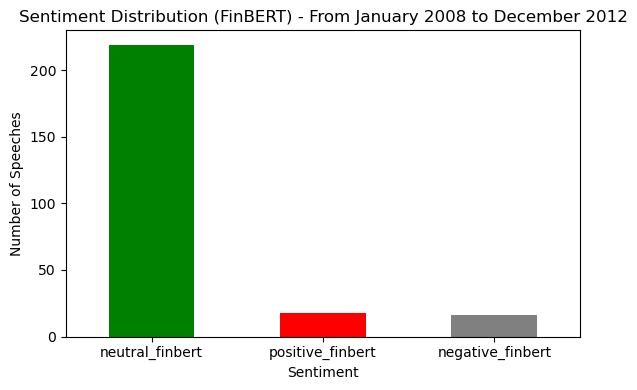

In [30]:
# ========================
# 2. Sentiment distribution (FinBERT)
# ========================
df['DominantSentiment'] = df[['positive_finbert', 'negative_finbert', 'neutral_finbert']].idxmax(axis=1)
sentiment_counts = df['DominantSentiment'].value_counts()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
#plt.title("Sentiment Distribution (FinBERT)")
#plt.title(f"Sentiment Distribution (FinBERT) - Starting from {start_date}")
plt.title(f"Sentiment Distribution (FinBERT) - From {start_date_formatted} to {end_date_formatted}")
plt.xlabel("Sentiment")
plt.ylabel("Number of Speeches")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

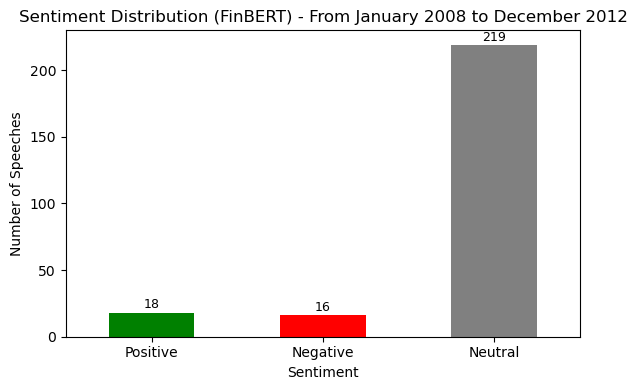

In [32]:
# ========================
# 2. Sentiment distribution (FinBERT)
# ========================

# Identify the dominant sentiment per speech
df['DominantSentiment'] = df[['positive_finbert', 'negative_finbert', 'neutral_finbert']].idxmax(axis=1)

# Count the number of speeches per sentiment
sentiment_counts = df['DominantSentiment'].value_counts().reindex(['positive_finbert', 'negative_finbert', 'neutral_finbert'])

# Plotting
plt.figure(figsize=(6, 4))
bars = sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Titles and labels
plt.title(f"Sentiment Distribution (FinBERT) - From {start_date_formatted} to {end_date_formatted}")
plt.xlabel("Sentiment")
plt.ylabel("Number of Speeches")
plt.xticks(
    ticks=[0, 1, 2],
    labels=['Positive', 'Negative', 'Neutral'],
    rotation=0
)
plt.tight_layout()

# Annotate counts on top of bars
for idx, value in enumerate(sentiment_counts):
    plt.text(idx, value + 1, str(value), ha='center', va='bottom', fontsize=9)

plt.show()


# 6. Top 20 Most Used Words


C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_26316\1938706826.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")


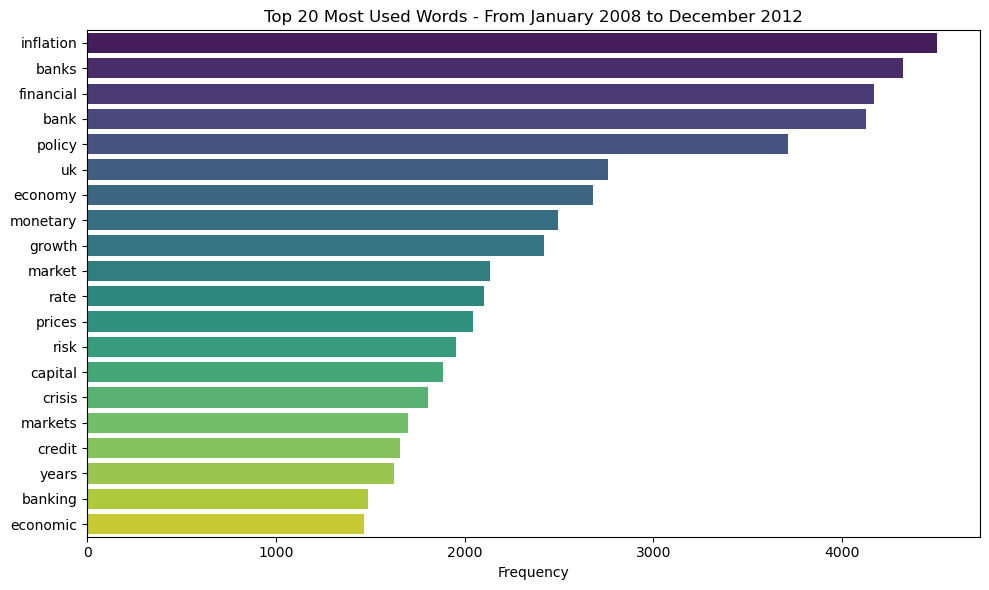

In [35]:
# ========================
# 3. Top 20 Most Used Words
# ========================
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Text'].dropna())
word_counts = X.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()
word_freq = dict(zip(vocab, word_counts))
top_words = dict(Counter(word_freq).most_common(20))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette="viridis")
#plt.title("Top 20 Most Used Words - From {start_date} to {end_date}")
plt.title(f"Top 20 Most Used Words - From {start_date_formatted} to {end_date_formatted}")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

# 7. Histogram of Polarity Scores

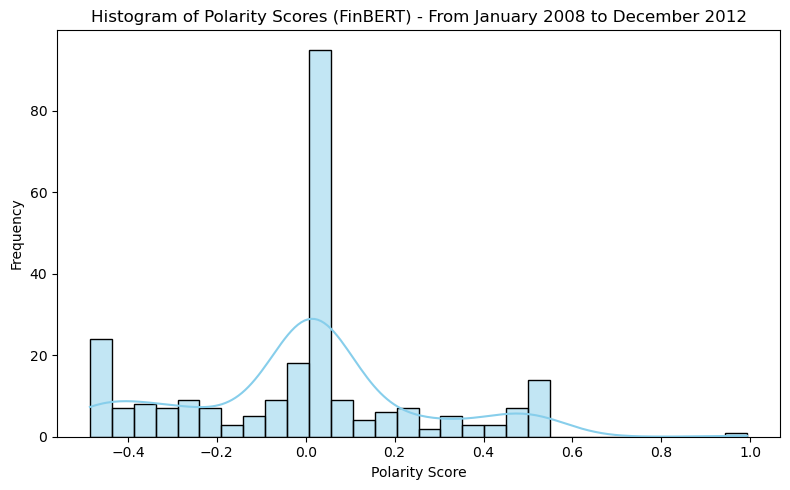

In [37]:
# ========================
# 4. Histogram of Polarity Scores
# ========================
plt.figure(figsize=(8, 5))
sns.histplot(df['polarity_score_finbert'].dropna(), bins=30, kde=True, color='skyblue')
#plt.title("Histogram of Polarity Scores (TextBlob)")
plt.title(f"Histogram of Polarity Scores (FinBERT) - From {start_date_formatted} to {end_date_formatted}")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Histogram of Polarity Scores - The histogram shows that the majority of polarity scores fall within a mildly positive range, peaking around 0.05 to 0.10. This suggests that, overall, the analyzed texts from January 2018 to December 2022 tend to express slightly positive sentiment. Negative and highly positive sentiments are relatively rare, indicating a generally balanced and mildly optimistic tone throughout the dataset.

# 8. Top 5 Positive/Negative Words (from top speeches)


Top 5 Words in Most Positive Speeches:
financial: 145
economy: 118
growth: 118
risk: 104
uk: 89

Top 5 Words in Most Negative Speeches:
inflation: 135
policy: 109
economy: 107
year: 91
economic: 85


C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_26316\2708839022.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words_pos.values()), y=list(top_words_pos.keys()), palette="Greens_r", ax=axes[0])
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_26316\2708839022.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words_neg.values()), y=list(top_words_neg.keys()), palette="Reds_r", ax=axes[1])


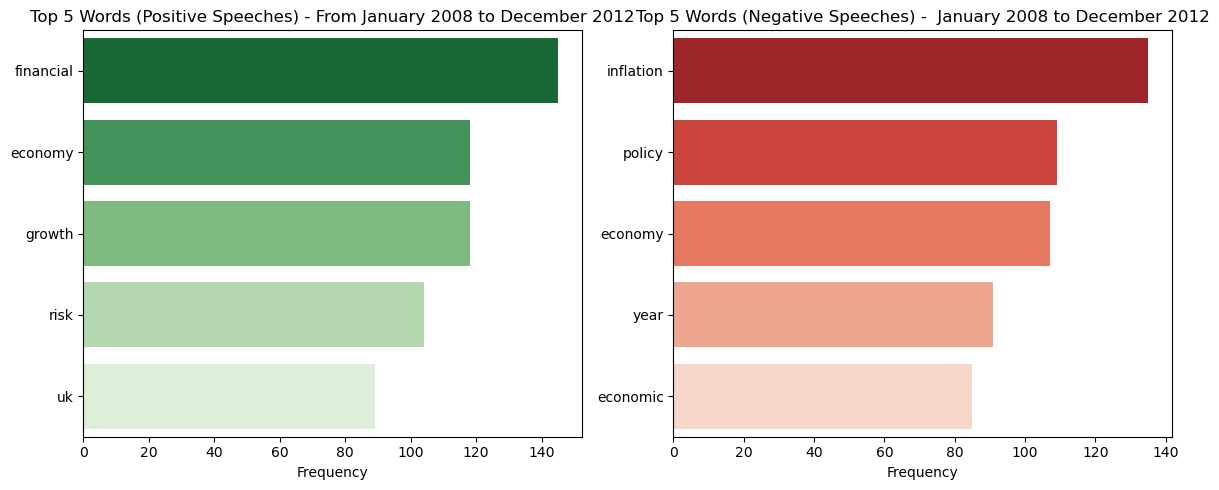

In [41]:
# ========================
# 1b. Top 5 Positive/Negative Words (from top speeches)
# ========================

# Ensure 'polarity_textblob' is numeric
df['polarity_score_finbert'] = pd.to_numeric(df['polarity_score_finbert'], errors='coerce')
df = df.dropna(subset=['polarity_textblob', 'Text'])  # Drop rows with missing polarity or text

# Use the top 5 positive/negative speeches
top5_texts_pos = df.nlargest(5, 'polarity_score_finbert')['Text']
top5_texts_neg = df.nsmallest(5, 'polarity_score_finbert')['Text']

# Vectorize separately for positive and negative speeches
vectorizer = CountVectorizer(stop_words='english')

# Positive
X_pos = vectorizer.fit_transform(top5_texts_pos)
word_counts_pos = X_pos.toarray().sum(axis=0)
vocab_pos = vectorizer.get_feature_names_out()
word_freq_pos = dict(zip(vocab_pos, word_counts_pos))
top_words_pos = dict(Counter(word_freq_pos).most_common(5))

# Negative
X_neg = vectorizer.fit_transform(top5_texts_neg)

# ========================
# 1b. Top 5 Positive/Negative Words (from top speeches)
# ========================

# Ensure 'polarity_textblob' is numeric
df['polarity_score_finbert'] = pd.to_numeric(df['polarity_score_finbert'], errors='coerce')
df = df.dropna(subset=['polarity_score_finbert', 'Text'])  # Drop rows with missing polarity or text

# Use the top 5 positive/negative speeches
top5_texts_pos = df.nlargest(5, 'polarity_score_finbert')['Text']
top5_texts_neg = df.nsmallest(5, 'polarity_score_finbert')['Text']

# Vectorize separately for positive and negative speeches
vectorizer = CountVectorizer(stop_words='english')

# Positive
X_pos = vectorizer.fit_transform(top5_texts_pos)
word_counts_pos = X_pos.toarray().sum(axis=0)
vocab_pos = vectorizer.get_feature_names_out()
word_freq_pos = dict(zip(vocab_pos, word_counts_pos))
top_words_pos = dict(Counter(word_freq_pos).most_common(5))

# Negative
X_neg = vectorizer.fit_transform(top5_texts_neg)
word_counts_neg = X_neg.toarray().sum(axis=0)
vocab_neg = vectorizer.get_feature_names_out()
word_freq_neg = dict(zip(vocab_neg, word_counts_neg))
top_words_neg = dict(Counter(word_freq_neg).most_common(5))

# Display
print("Top 5 Words in Most Positive Speeches:")
for word, count in top_words_pos.items():
    print(f"{word}: {count}")

print("\nTop 5 Words in Most Negative Speeches:")
for word, count in top_words_neg.items():
    print(f"{word}: {count}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=list(top_words_pos.values()), y=list(top_words_pos.keys()), palette="Greens_r", ax=axes[0])
#axes[0].set_title("Top 5 Words (Positive Speeches)")
axes[0].set_title(f"Top 5 Words (Positive Speeches) - From {start_date_formatted} to {end_date_formatted}")
axes[0].set_xlabel("Frequency")

sns.barplot(x=list(top_words_neg.values()), y=list(top_words_neg.keys()), palette="Reds_r", ax=axes[1])
#axes[1].set_title("Top 5 Words (Negative Speeches)")
#axes[1].set_title(f"Top 5 Words (Negative Speeches) - From {start_date_formatted} to {end_date_formatted}")
axes[1].set_title(f"Top 5 Words (Negative Speeches) -  {start_date_formatted} to {end_date_formatted}")
axes[1].set_xlabel("Frequency")

plt.tight_layout()
plt.show()


C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_26316\4247787762.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words_pos.values()), y=list(top_words_pos.keys()), palette="Greens_r", ax=axes[0, 0])
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_26316\4247787762.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words_neg.values()), y=list(top_words_neg.keys()), palette="Reds_r", ax=axes[1, 0])


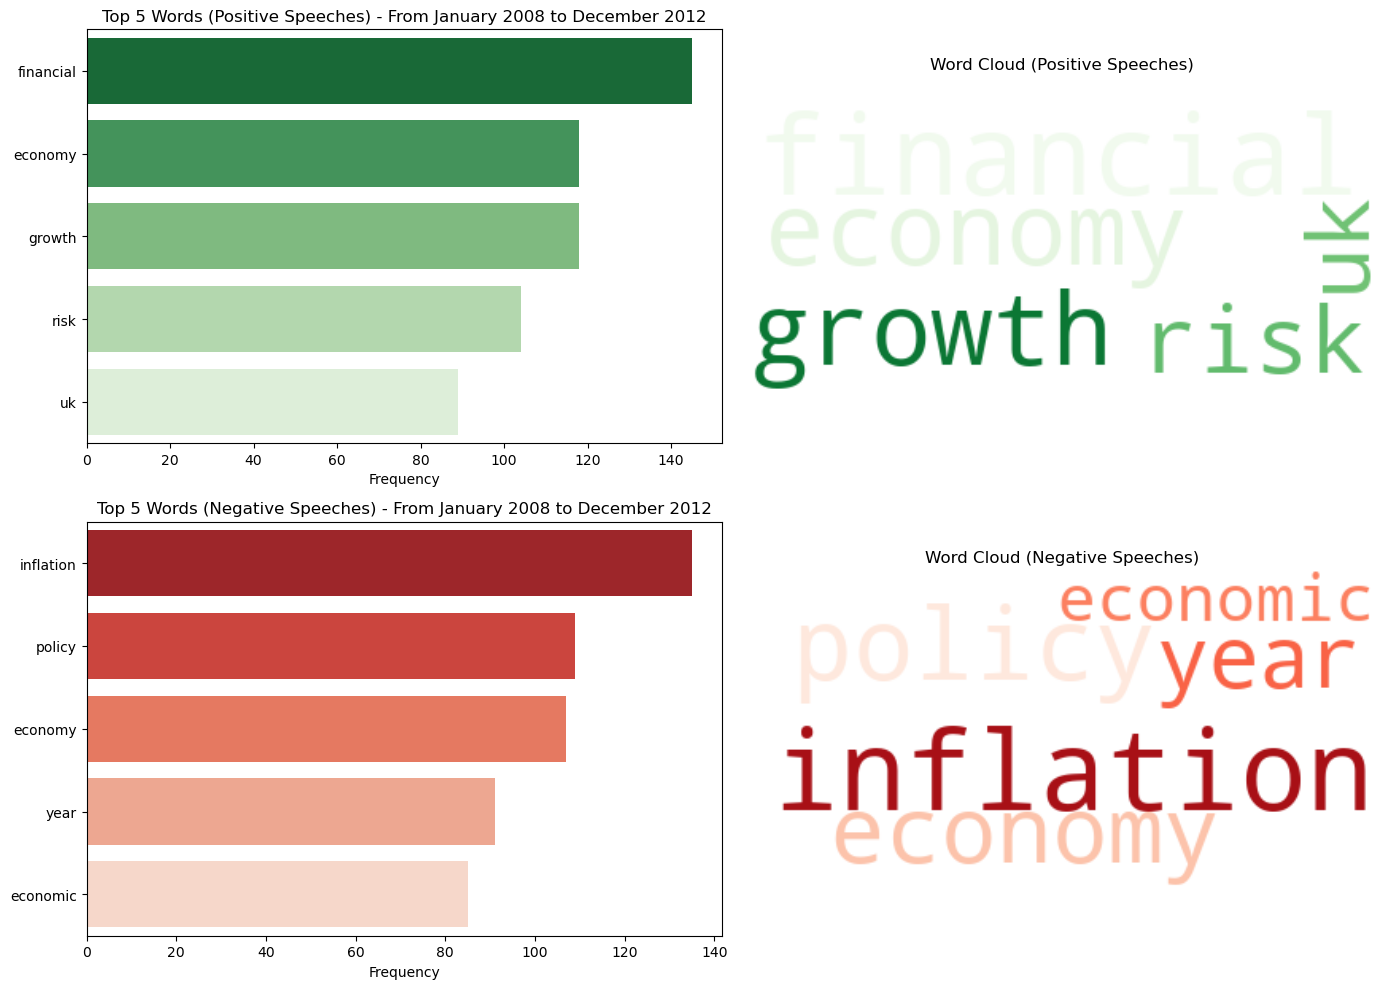

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# (Your existing code here)

# ========================
# After you have top_words_pos and top_words_neg dictionaries
# ========================

# Generate word clouds
wordcloud_pos = WordCloud(width=400, height=200, background_color='white', colormap='Greens').generate_from_frequencies(top_words_pos)
wordcloud_neg = WordCloud(width=400, height=200, background_color='white', colormap='Reds').generate_from_frequencies(top_words_neg)

# Plot barplots and word clouds side by side
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Barplot Positive
sns.barplot(x=list(top_words_pos.values()), y=list(top_words_pos.keys()), palette="Greens_r", ax=axes[0, 0])
#axes[0, 0].set_title("Top 5 Words (Positive Speeches)")
axes[0,0].set_title(f"Top 5 Words (Positive Speeches) - From {start_date_formatted} to {end_date_formatted}")
axes[0, 0].set_xlabel("Frequency")

# Wordcloud Positive
axes[0, 1].imshow(wordcloud_pos, interpolation='bilinear')
axes[0, 1].axis('off')
axes[0, 1].set_title("Word Cloud (Positive Speeches)")

# Barplot Negative
sns.barplot(x=list(top_words_neg.values()), y=list(top_words_neg.keys()), palette="Reds_r", ax=axes[1, 0])
#axes[1, 0].set_title("Top 5 Words (Negative Speeches)")
axes[1,0].set_title(f"Top 5 Words (Negative Speeches) - From {start_date_formatted} to {end_date_formatted}")
axes[1, 0].set_xlabel("Frequency")

# Wordcloud Negative
axes[1, 1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1, 1].axis('off')
axes[1, 1].set_title("Word Cloud (Negative Speeches)")

plt.tight_layout()
plt.show()


# 9. Top 10 Words Over the Period

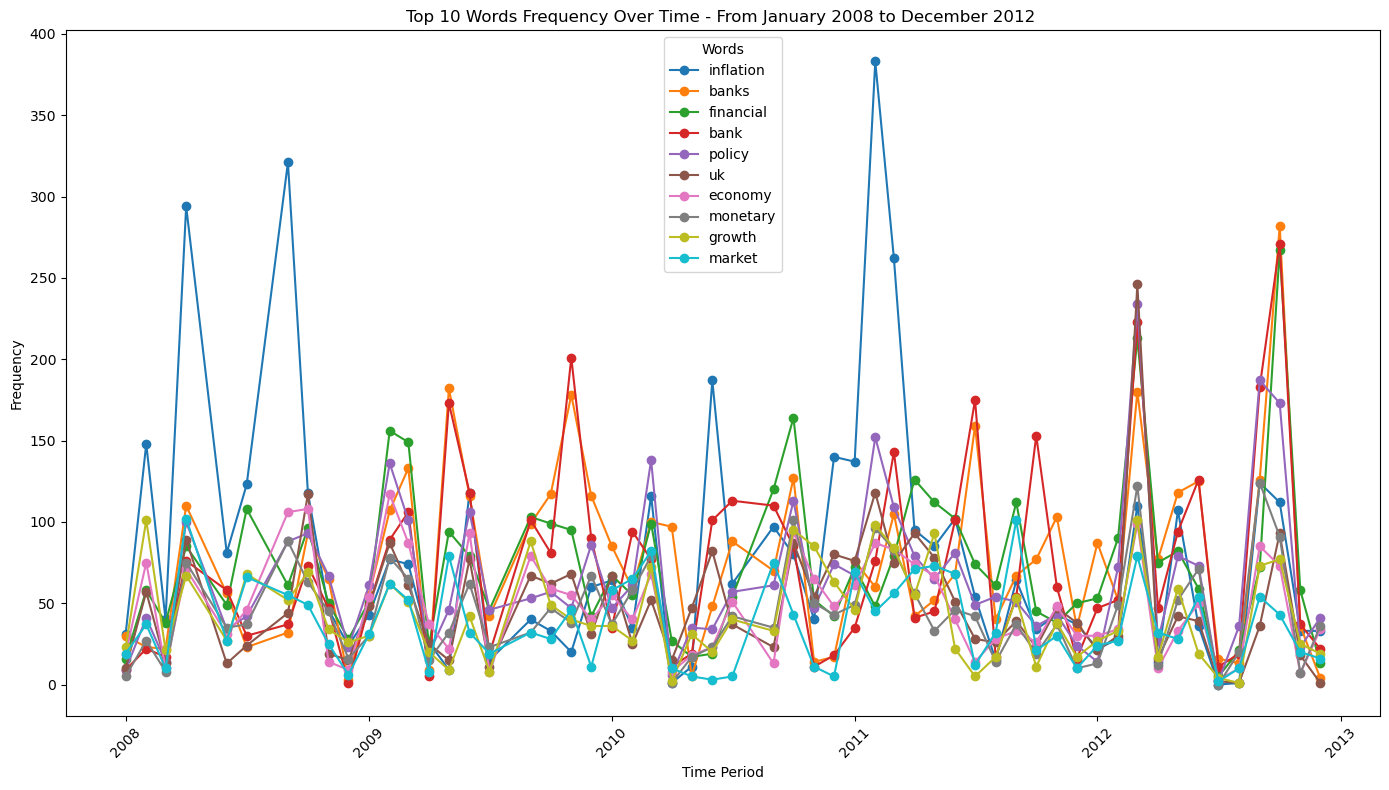

In [46]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
N = 10  # Top N words to track
time_col = 'Date'  # Your date/time column
df[time_col] = pd.to_datetime(df[time_col])  # Ensure datetime

# Define time grouping - here monthly, can change to 'W' (weekly), 'D' (daily) etc.
df['time_period'] = df[time_col].dt.to_period('M').dt.to_timestamp()

# Group texts by time period
grouped = df.groupby('time_period')['Text'].apply(lambda texts: ' '.join(texts))

# Vectorize grouped texts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(grouped)

# Get vocabulary and sum frequencies across all time periods to find top words
total_word_counts = X.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()

# Select top N words overall
top_n_indices = total_word_counts.argsort()[::-1][:N]
top_n_words = [vocab[i] for i in top_n_indices]

# Create a DataFrame with time periods as rows and top words frequencies as columns
freq_df = pd.DataFrame(X.toarray(), index=grouped.index, columns=vocab)
freq_top_n = freq_df[top_n_words]

# Plotting the trends over time for top N words
plt.figure(figsize=(14, 8))
for word in top_n_words:
    plt.plot(freq_top_n.index, freq_top_n[word], marker='o', label=word)

plt.title(f"Top {N} Words Frequency Over Time - From {start_date_formatted} to {end_date_formatted} ")
plt.xlabel("Time Period")
plt.ylabel("Frequency")
plt.legend(title="Words")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 10. Analyze a Dip & Peak Timestamp and Its Surrounding Events in Top Positive Speeches

In [49]:
# Group by monthly periods and count speeches
df['time_period'] = df['Date'].dt.to_period('M').dt.to_timestamp()
speech_counts = df.groupby('time_period').size()

# Find the timestamp with the dip
dip_timestamp = speech_counts.idxmin()
dip_value = speech_counts.min()

print(f"Dip occurred at: {dip_timestamp}, with a value of {dip_value}")

Dip occurred at: 2008-12-01 00:00:00, with a value of 1


In [51]:
# Filter data for one period before and after the dip
dip_period_data = df[(df['time_period'] >= dip_timestamp - pd.DateOffset(months=1)) &
                     (df['time_period'] <= dip_timestamp + pd.DateOffset(months=1))]

# Analyze the data around the dip
print(dip_period_data[['Date', 'Author', 'Text', 'IsGov']])

          Date        Author  \
316 2008-12-09      Sentence   
320 2008-11-18        Besley   
321 2008-11-19         Gieve   
322 2008-11-22          Bean   
323 2008-11-25        Tucker   
374 2009-01-20          King   
375 2009-01-29  Blanchflower   
384 2009-01-16         Gieve   

                                                  Text IsGov  
316  pleased opportunity speak years monetary polic...    No  
320  lecture far reviewed historical experience inf...    No  
321  years sterling left erm successful stable life...    No  
322  present financial crisis many parents encompas...    No  
323  paper shall briefly discuss five issues 1 coll...    No  
374  certain truths selfevident one financial marke...    No  
375  function economic forecasting make astrology l...    No  
384  one things strikes coming back manchester pace...    No  


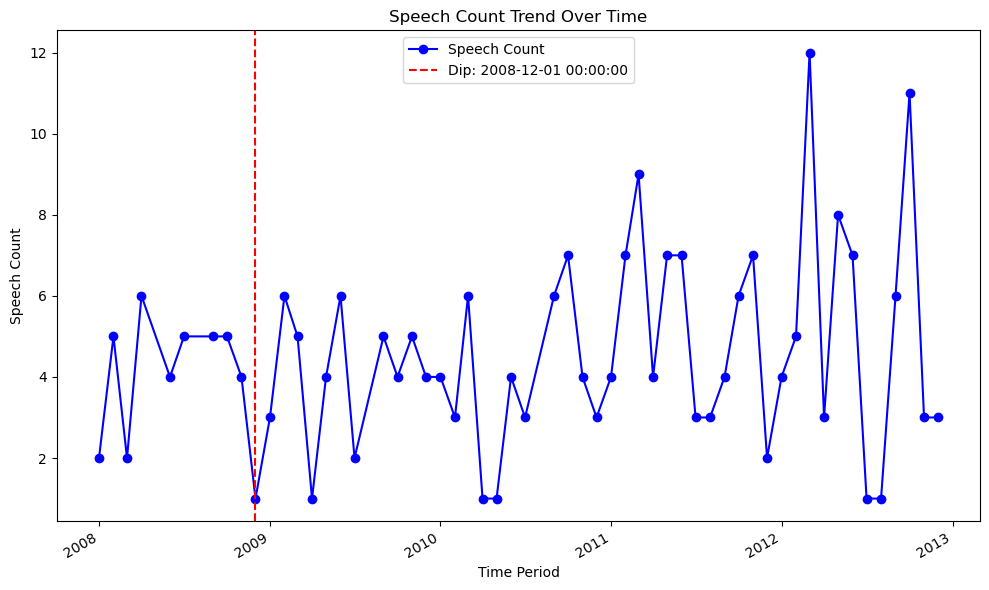

In [53]:
import matplotlib.pyplot as plt

# Plot speech counts over time
plt.figure(figsize=(10, 6))
speech_counts.plot(kind='line', marker='o', color='blue', label='Speech Count')

# Highlight the dip
plt.axvline(x=dip_timestamp, color='red', linestyle='--', label=f'Dip: {dip_timestamp}')

# Add labels and title
plt.title('Speech Count Trend Over Time')
plt.xlabel('Time Period')
plt.ylabel('Speech Count')
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
# Group by time period (e.g., monthly) and count the number of speeches
speech_counts = df.groupby('time_period').size()

# Find the timestamp with the peak
peak_timestamp = speech_counts.idxmax()
peak_value = speech_counts.max()

print(f"Peak occurred at: {peak_timestamp}, with a value of {peak_value}")

# Filter data for the peak period
peak_period_data = df[df['time_period'] == peak_timestamp]

# Analyze the data for the peak period
print("Details of speeches during the peak period:")
print(peak_period_data[['Date', 'Author', 'Text', 'IsGov']])

Peak occurred at: 2012-03-01 00:00:00, with a value of 12
Details of speeches during the peak period:
          Date     Author                                               Text  \
564 2012-03-01      Miles  last month mpc voted loosen monetary policy ex...   
565 2012-03-12     Fisher  delighted invited address evening university w...   
566 2012-03-13     Tucker  many thanks inviting morning trust provide use...   
567 2012-03-15  Broadbent  2008 part comprehensive history episodes econo...   
568 2012-03-20       Dale  thank much invitation speak evening join cente...   
569 2012-03-22    No_Info  thank much iflr greatest problem international...   
571 2012-03-26      Cohrs  financial crisis 2008 took world surprise even...   
572 2012-03-24       King  dinner last night shall remember long time for...   
581 2012-03-29    No_Info  rules game global financial system remade eu c...   
582 2012-03-29     Fisher  bank englands market operations designed allow...   
583 2012-03-27    

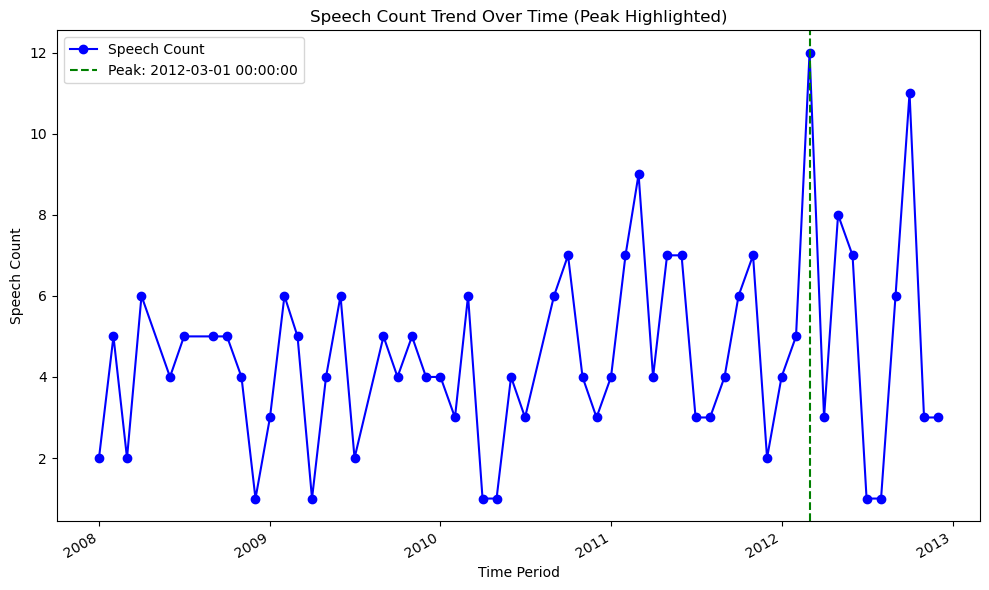

In [57]:
import matplotlib.pyplot as plt

# Plot the speech count trend
plt.figure(figsize=(10, 6))
speech_counts.plot(kind='line', marker='o', color='blue', label='Speech Count')

# Highlight the peak
plt.axvline(x=peak_timestamp, color='green', linestyle='--', label=f'Peak: {peak_timestamp}')

# Add titles and labels
plt.title('Speech Count Trend Over Time (Peak Highlighted)')
plt.xlabel('Time Period')
plt.ylabel('Speech Count')
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert Date column to datetime and create a time_period column
df['Date'] = pd.to_datetime(df['Date'])
df['time_period'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Filter for positive speeches only (e.g., where positive_finbert > 0.5)
positive_speeches = df[df['positive_finbert'] > 0.1]

# Group by time period and count positive speeches
positive_counts = positive_speeches.groupby('time_period').size()

# Find the peak and dip timestamps
peak_timestamp = positive_counts.idxmax()
peak_value = positive_counts.max()
dip_timestamp = positive_counts.idxmin()
dip_value = positive_counts.min()

print(f"Peak of positive speeches: {peak_timestamp} with {peak_value} speeches")
print(f"Dip of positive speeches: {dip_timestamp} with {dip_value} speeches")

# Filter data for the peak period
peak_period_data = positive_speeches[positive_speeches['time_period'] == peak_timestamp]

# Filter data for the dip period
dip_period_data = positive_speeches[positive_speeches['time_period'] == dip_timestamp]

# Display details
print("\nDetails of speeches during the peak period:")
print(peak_period_data[['Date', 'Author', 'Text', 'IsGov']])

print("\nDetails of speeches during the dip period:")
print(dip_period_data[['Date', 'Author', 'Text', 'IsGov']])

Peak of positive speeches: 2008-04-01 00:00:00 with 5 speeches
Dip of positive speeches: 2008-06-01 00:00:00 with 1 speeches

Details of speeches during the peak period:
          Date        Author  \
339 2008-04-22        Besley   
340 2008-04-23       No_Info   
341 2008-04-24     Jenkinson   
342 2008-04-29  Blanchflower   
346 2008-04-02       No_Info   

                                                  Text IsGov  
339  ladies gentlemen thank coming speaking year ag...    No  
340  delighted opportunity speak cbi headquarters c...    No  
341  commercial banks play pivotal role economy fac...    No  
342  great pleasure addressing evening david hume i...    No  
346  alongside many others money market fund indust...    No  

Details of speeches during the dip period:
          Date   Author                                               Text  \
345 2008-06-18  No_Info  really year since last met magnificent room fi...   

    IsGov  
345    No  


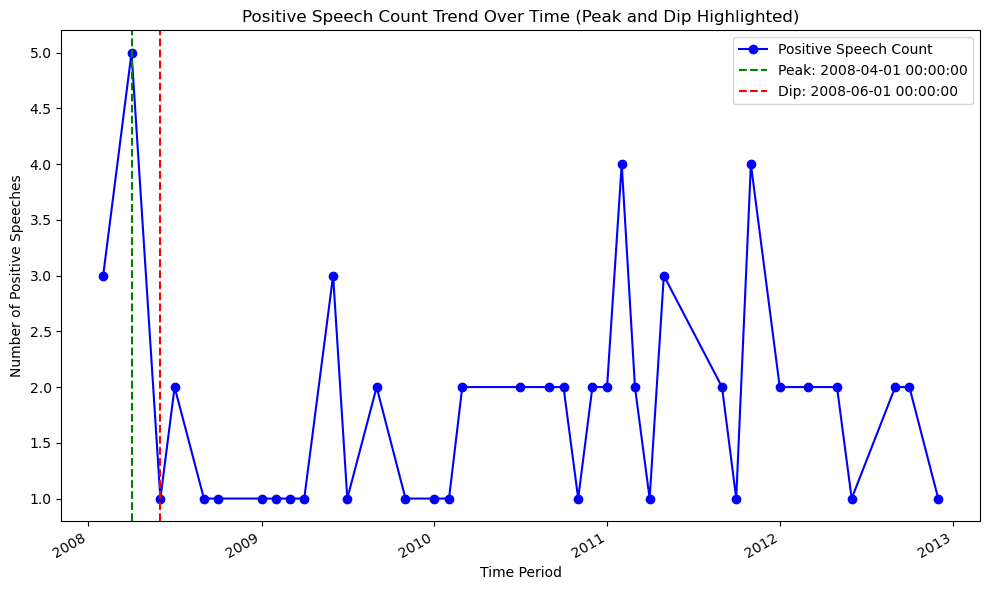

In [61]:
# Plot positive speech counts over time
plt.figure(figsize=(10, 6))
positive_counts.plot(kind='line', marker='o', color='blue', label='Positive Speech Count')

# Highlight the peak and dip
plt.axvline(x=peak_timestamp, color='green', linestyle='--', label=f'Peak: {peak_timestamp}')
plt.axvline(x=dip_timestamp, color='red', linestyle='--', label=f'Dip: {dip_timestamp}')

# Add titles and labels
plt.title('Positive Speech Count Trend Over Time (Peak and Dip Highlighted)')
plt.xlabel('Time Period')
plt.ylabel('Number of Positive Speeches')
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert Date column to datetime and create a time_period column
df['Date'] = pd.to_datetime(df['Date'])
df['time_period'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Filter for negative speeches only (e.g., where negative_finbert > 0.5)
negative_speeches = df[df['negative_finbert'] > 0.01]

# Group by time period and count negative speeches
negative_counts = negative_speeches.groupby('time_period').size()

# Find the peak and dip timestamps
peak_timestamp = negative_counts.idxmax()
peak_value = negative_counts.max()
dip_timestamp = negative_counts.idxmin()
dip_value = negative_counts.min()

print(f"Peak of negative speeches: {peak_timestamp} with {peak_value} speeches")
print(f"Dip of negative speeches: {dip_timestamp} with {dip_value} speeches")

# Filter data for the peak period
peak_period_data = negative_speeches[negative_speeches['time_period'] == peak_timestamp]

# Filter data for the dip period
dip_period_data = negative_speeches[negative_speeches['time_period'] == dip_timestamp]

# Display details
print("\nDetails of speeches during the peak period:")
print(peak_period_data[['Date', 'Author', 'Text', 'IsGov']])

print("\nDetails of speeches during the dip period:")
print(dip_period_data[['Date', 'Author', 'Text', 'IsGov']])

Peak of negative speeches: 2009-02-01 00:00:00 with 6 speeches
Dip of negative speeches: 2008-07-01 00:00:00 with 1 speeches

Details of speeches during the peak period:
          Date        Author  \
376 2009-02-13       Haldane   
377 2009-02-16          Bean   
378 2009-02-17        Besley   
379 2009-02-19         Gieve   
380 2009-02-24      Sentance   
381 2009-02-25  Blanchflower   

                                                  Text IsGov  
376  historical standard financial crisis past 18 m...    No  
377  weather forefront farmers minds rarely crosses...    No  
378  one striking feature current downturn apparent...    No  
379  know leave bank england three years deputy gov...    No  
380  delighted opportunity speak years iea state ec...    No  
381  take life take means whereby live great pleasu...    No  

Details of speeches during the dip period:
          Date Author                                               Text IsGov
324 2008-07-18  Gieve  troubled times cit

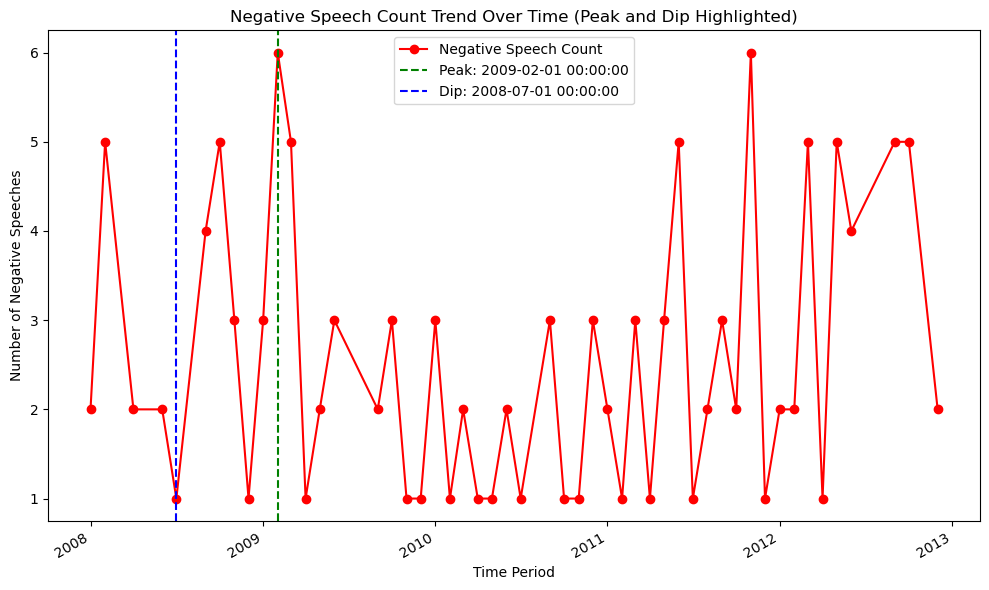

In [67]:
# Plot negative speech counts over time
plt.figure(figsize=(10, 6))
negative_counts.plot(kind='line', marker='o', color='red', label='Negative Speech Count')

# Highlight the peak and dip
plt.axvline(x=peak_timestamp, color='green', linestyle='--', label=f'Peak: {peak_timestamp}')
plt.axvline(x=dip_timestamp, color='blue', linestyle='--', label=f'Dip: {dip_timestamp}')

# Add titles and labels
plt.title('Negative Speech Count Trend Over Time (Peak and Dip Highlighted)')
plt.xlabel('Time Period')
plt.ylabel('Number of Negative Speeches')
plt.legend()
plt.tight_layout()
plt.show()

# 11. Analyze the Top 3 Most Frequent Words by Author

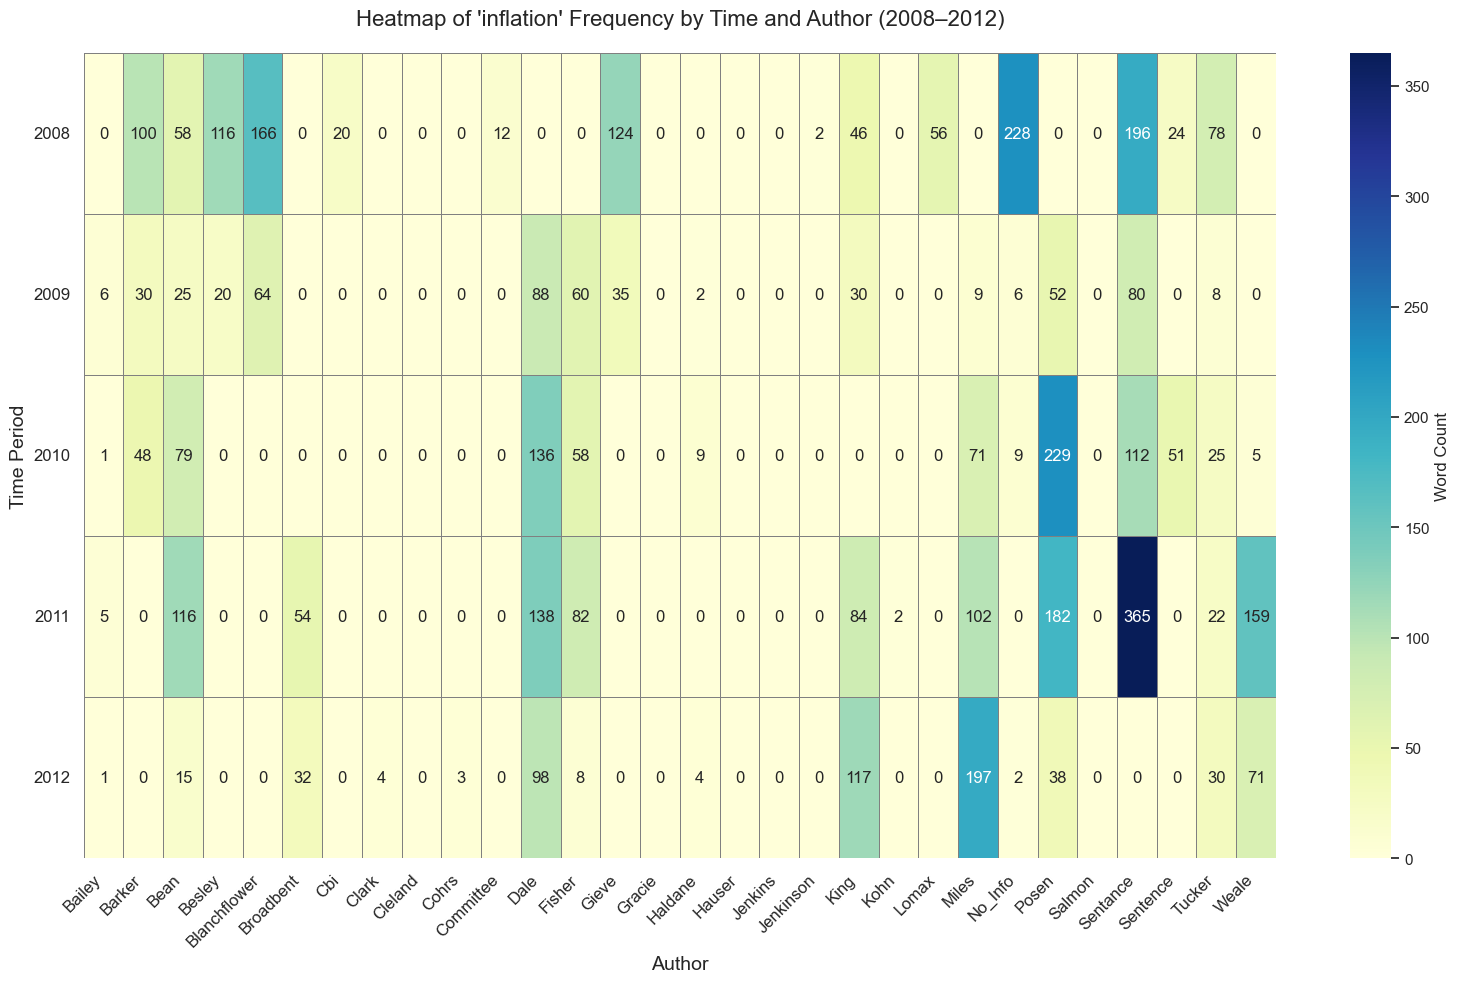

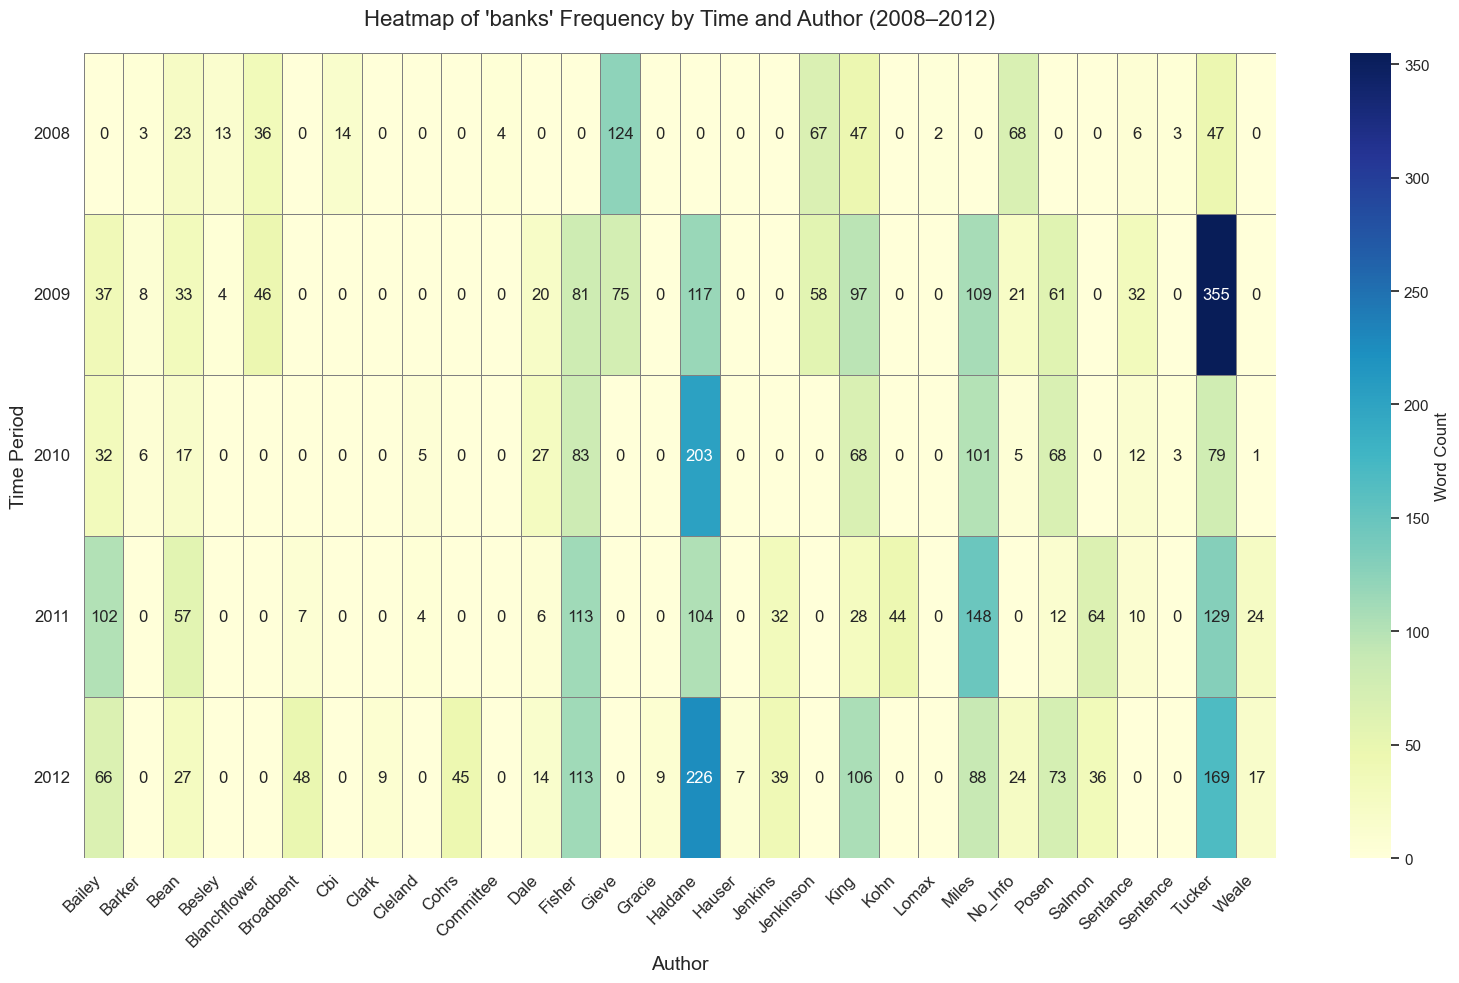

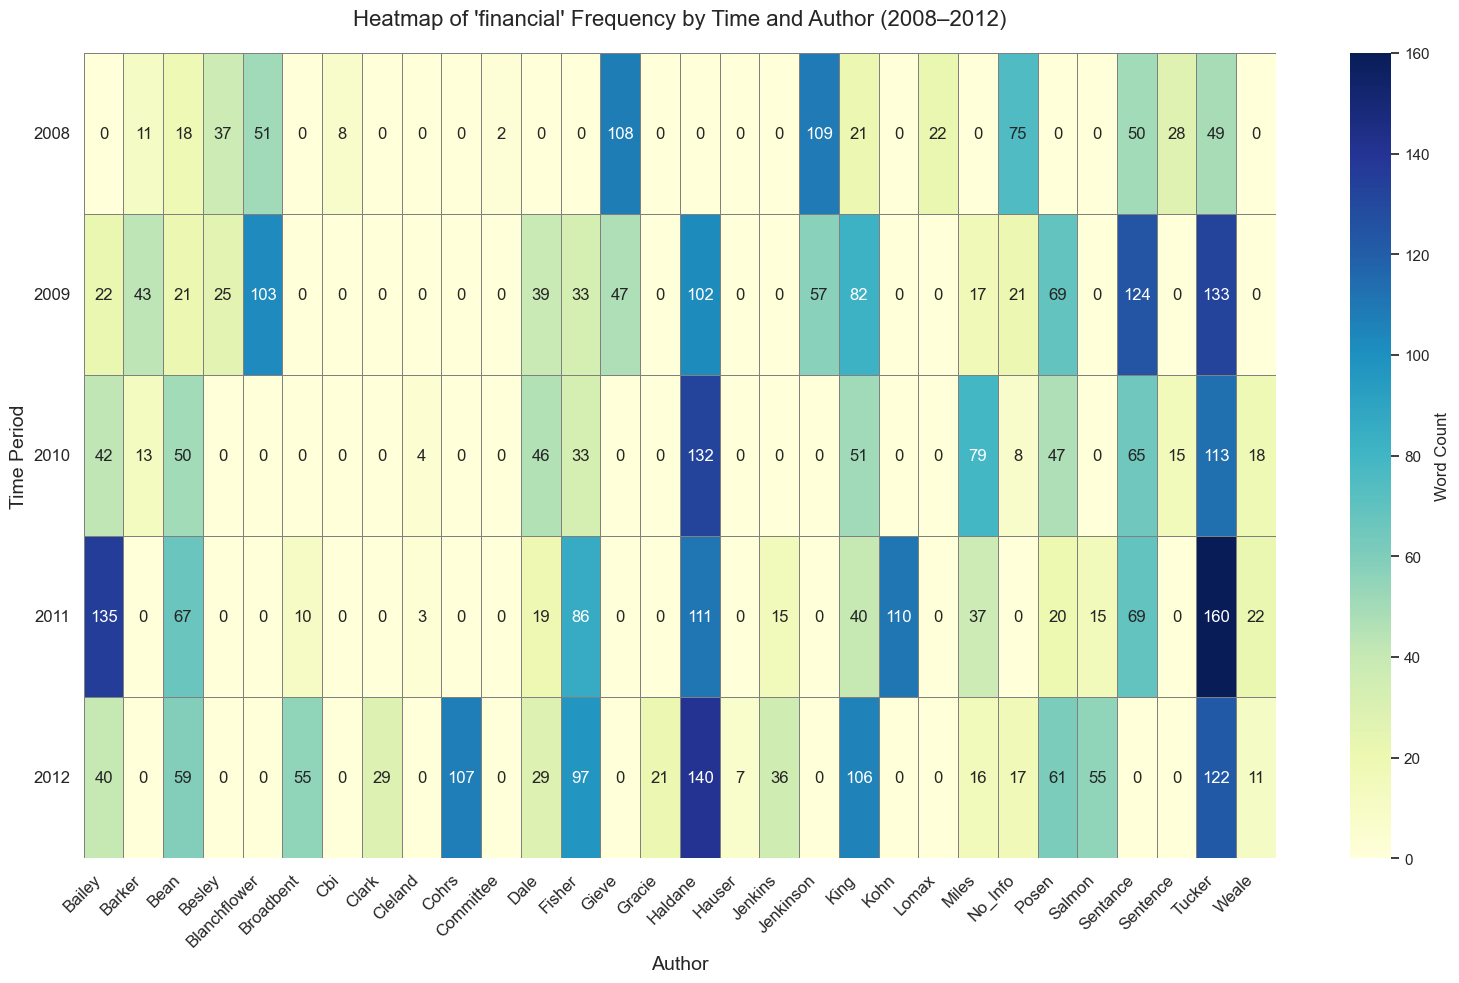

In [120]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
N = 3  # number of words to track (top N overall)
time_col = 'Date'
author_col = 'Author'

# Ensure datetime and define yearly grouping
df[time_col] = pd.to_datetime(df[time_col])
df['time_period'] = df[time_col].dt.to_period('Y').dt.to_timestamp()

# Group by author and time, then join text
grouped = df.groupby([author_col, 'time_period'])['Text'].apply(lambda texts: ' '.join(texts)).reset_index()

# Vectorize text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(grouped['Text'])

# Find top N words overall
total_counts = X.toarray().sum(axis=0)
vocab = vectorizer.get_feature_names_out()
top_n_indices = total_counts.argsort()[::-1][:N]
top_n_words = [vocab[i] for i in top_n_indices]

# DataFrame with word counts
counts_df = pd.DataFrame(X.toarray(), columns=vocab)
counts_df[author_col] = grouped[author_col]
counts_df['time_period'] = grouped['time_period']

# Time range for titles
start_date_formatted = df[time_col].min().strftime('%Y')
end_date_formatted = df[time_col].max().strftime('%Y')

for word in top_n_words:
    pivot_table = counts_df.pivot(index='time_period', columns=author_col, values=word).fillna(0)
    pivot_table.index = pivot_table.index.strftime('%Y')  # Clean time labels

    plt.figure(figsize=(16, 10))
    sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Word Count'},
                linewidths=0.5, linecolor='gray')
    plt.title(f"Heatmap of '{word}' Frequency by Time and Author ({start_date_formatted}–{end_date_formatted})",
              fontsize=16, pad=20)
    plt.xlabel("Author", fontsize=14)
    plt.ylabel("Time Period", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout()
    plt.show()

# 12.Sentiment-Weighted Word Frequency Analysis

In [82]:
!pip install adjustText

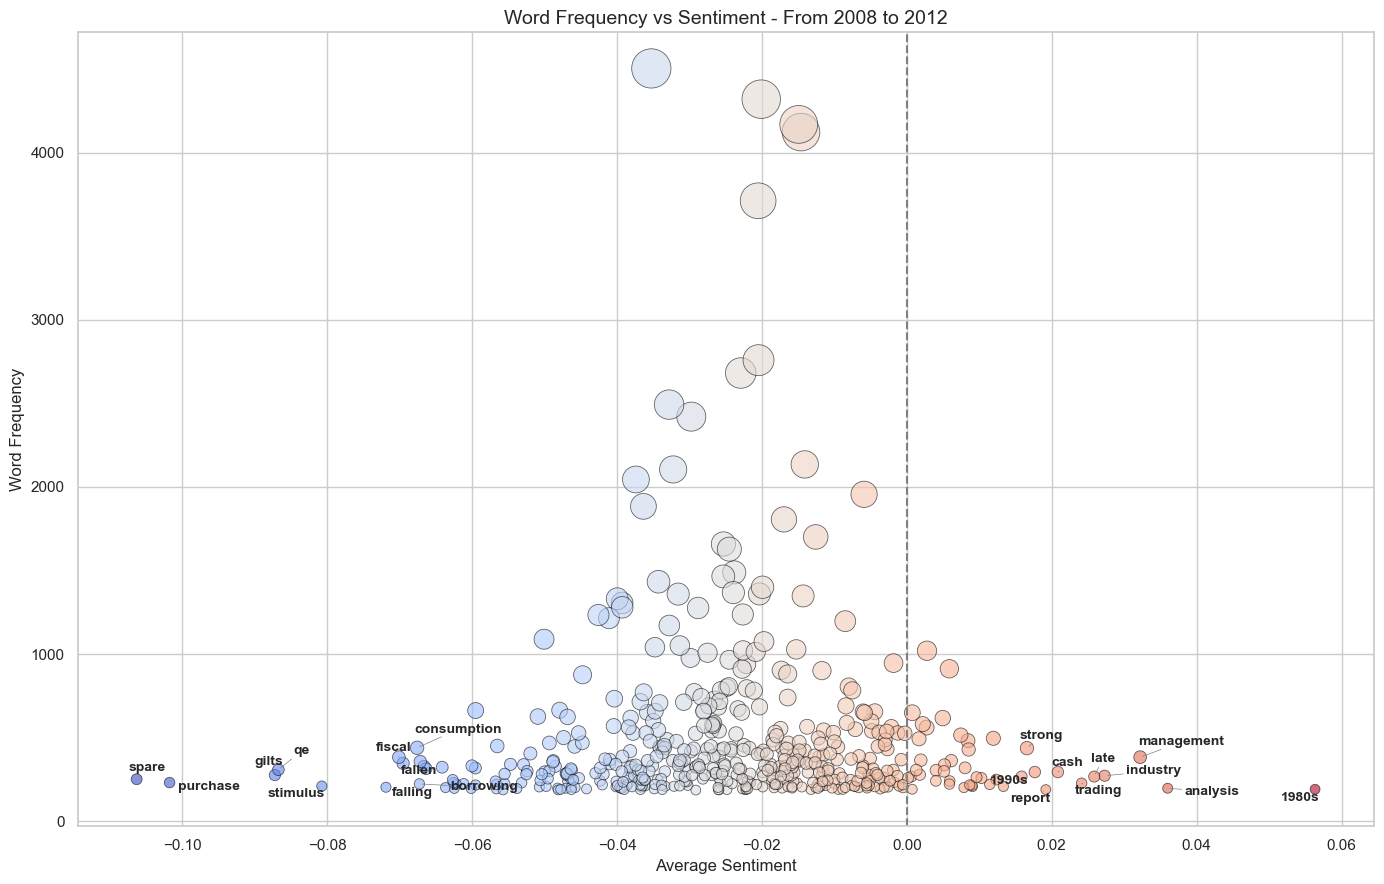

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from adjustText import adjust_text  # Install via: pip install adjustText
# Ensure sentiment and text are usable
df['polarity_score_finbert'] = pd.to_numeric(df['polarity_score_finbert'], errors='coerce')
df = df.dropna(subset=['polarity_score_finbert', 'Text'])

# Vectorize text
vectorizer = CountVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(df['Text'])
vocab = vectorizer.get_feature_names_out()

# Count and attach sentiment
word_counts = pd.DataFrame(X.toarray(), columns=vocab)
word_counts['polarity'] = df['polarity_score_finbert'].values

# Calculate frequency and average sentiment
word_stats = pd.DataFrame({
    'word': vocab,
    'frequency': word_counts[vocab].sum().values,
    'avg_sentiment': [word_counts.loc[word_counts[word] > 0, 'polarity'].mean() for word in vocab]
})

# Identify top positive and negative sentiment words
top_words = pd.concat([
    word_stats.sort_values('avg_sentiment', ascending=False).head(10),
    word_stats.sort_values('avg_sentiment').head(10)
])

# Plotting
plt.figure(figsize=(14, 9))
sns.set(style="whitegrid")

bubble = sns.scatterplot(
    data=word_stats,
    x="avg_sentiment",
    y="frequency",
    size="frequency",
    sizes=(50, 800),
    hue="avg_sentiment",
    palette="coolwarm",
    alpha=0.6,
    edgecolor="black",
    legend=False
)

# Optional: log scale y-axis if needed
# plt.yscale('log')

# Add text labels using adjustText
texts = []
for _, row in top_words.iterrows():
    texts.append(
        plt.text(row['avg_sentiment'], row['frequency'], row['word'],
                 fontsize=10, weight='bold', ha='center', va='center')
    )
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Axis and layout
plt.axvline(0, color='gray', linestyle='--')
plt.title(f"Word Frequency vs Sentiment - From {start_date_formatted} to {end_date_formatted}", fontsize=14)
plt.xlabel("Average Sentiment", fontsize=12)
plt.ylabel("Word Frequency", fontsize=12)
plt.tight_layout()
plt.show()


Top 5% sentiment cutoff: 0.006203674030872427


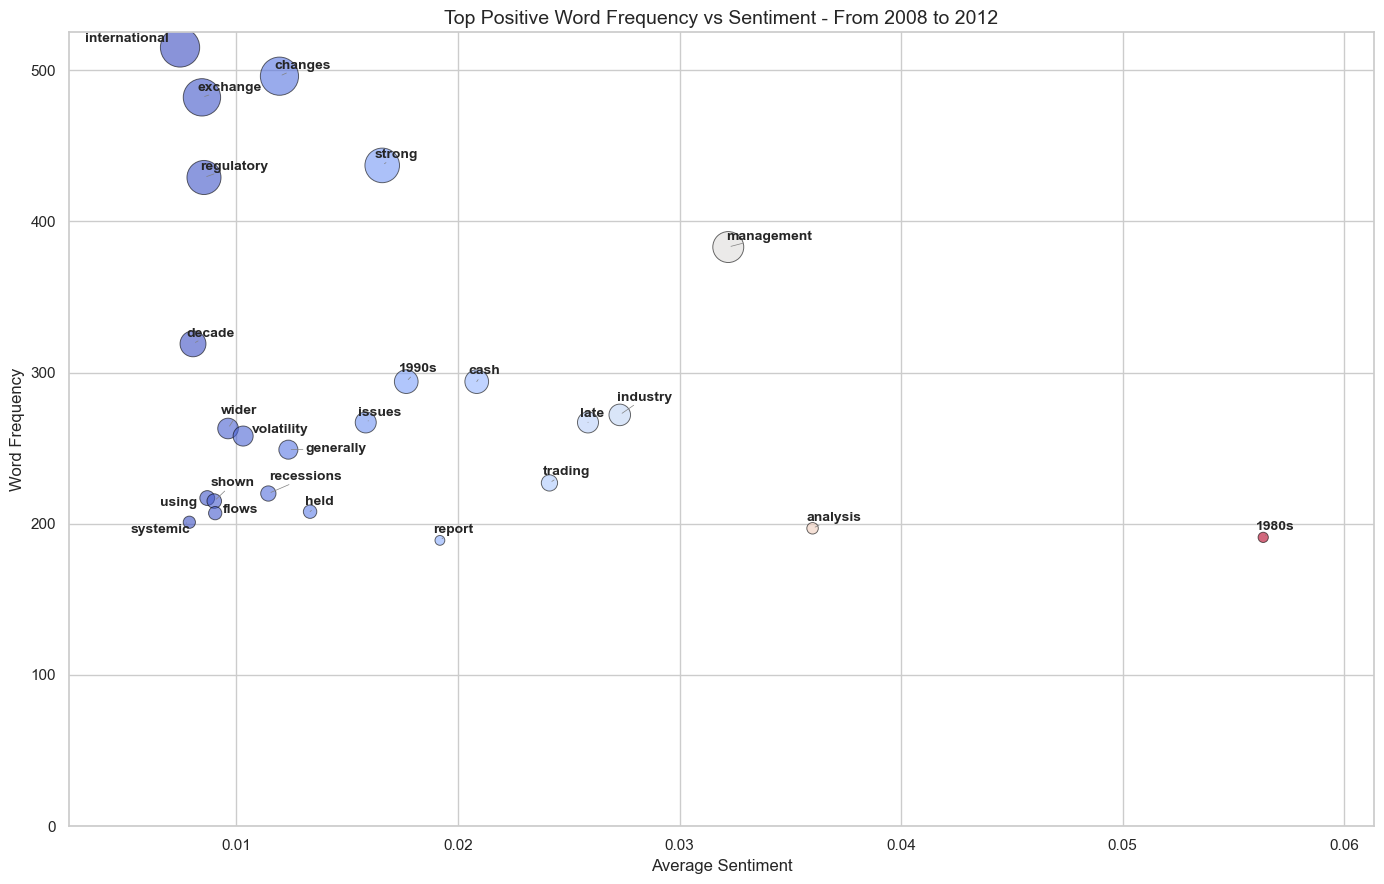

In [155]:
from adjustText import adjust_text  # Make sure it's installed: pip install adjustText

# Find the 95th percentile to capture top 5% sentiment words
sentiment_cutoff = word_stats['avg_sentiment'].quantile(0.95)
print("Top 5% sentiment cutoff:", sentiment_cutoff)

# Filter to words above that threshold
zoomed_stats = word_stats[word_stats['avg_sentiment'] >= sentiment_cutoff]
zoomed_stats = zoomed_stats.sort_values('frequency', ascending=False).head(30)

# Plot if we have data
if not zoomed_stats.empty:
    plt.figure(figsize=(14, 9))
    sns.set(style="whitegrid")

    bubble = sns.scatterplot(
        data=zoomed_stats,
        x="avg_sentiment",
        y="frequency",
        size="frequency",
        sizes=(50, 800),
        hue="avg_sentiment",
        palette="coolwarm",
        alpha=0.6,
        edgecolor="black",
        legend=False
    )

    from adjustText import adjust_text
    texts = []
    for _, row in zoomed_stats.iterrows():
        texts.append(
            plt.text(row['avg_sentiment'], row['frequency'], row['word'],
                     fontsize=10, weight='bold', ha='center', va='bottom')
        )
    # Dynamic axis limits based on data range + small buffer
x_min = zoomed_stats['avg_sentiment'].min()
x_max = zoomed_stats['avg_sentiment'].max()
y_max = zoomed_stats['frequency'].max()

x_buffer = (x_max - x_min) * 0.1 if x_max != x_min else 0.01
y_buffer = 10
plt.xlim(x_min - x_buffer, x_max + x_buffer)
plt.ylim(0, y_max + y_buffer)

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.axvline(0, color='gray', linestyle='--')
plt.xlim(zoomed_stats['avg_sentiment'].min() - 0.005, zoomed_stats['avg_sentiment'].max() + 0.005)
plt.ylim(0, zoomed_stats['frequency'].max() + 10)
plt.title(f"Top Positive Word Frequency vs Sentiment - From {start_date_formatted} to {end_date_formatted}",
              fontsize=14)
plt.xlabel("Average Sentiment", fontsize=12)
plt.ylabel("Word Frequency", fontsize=12)
plt.tight_layout()
plt.show()